# Dependencies

In [324]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

# 1. Load The Dataset

In [325]:
# Define the paths
path_train = "./turkiye-is-bankasi-ml-challenge-5/train_final.parquet"
path_test = "./turkiye-is-bankasi-ml-challenge-5/test_final.parquet"

In [326]:
# Load Train Parquet File
train_df = pd.read_parquet(path=path_train)

# Load Test Parquet File
test_df = pd.read_parquet(path=path_test)

# Load Both Parquet Files
total_df = pd.read_parquet(path=[path_train, path_test])

In [327]:
# DataFrame:
train_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,-0.263580,2.161242,2.651375,0.810021,1.516175,2.351266,-4.607631,0.678258,-0.555387,3.501726,-0.764794,1.543375,-1.457849,-1.017322,-1.819520,0.725629,-1.443580,1.087103,2.101993,-0.248796,-0.582920,-1.330125,1.407168,1.053509,-1.531511,1.667421,0.250819,-0.090907,2.676460,-0.620866,0.163055,1.720066,-6.139390,-0.302724,2.784268,-3.135499,-3.794420,0.930440,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,0.949101,3.567557,3.357848,0.434091,0.885814,1.451937,-3.183905,1.023886,1.165963,2.915730,-1.280556,3.018781,-3.163132,-1.120173,-2.798378,0.287021,-2.029428,0.259852,0.961554,-0.533738,-1.311127,-0.143812,-1.561752,1.930543,-0.942348,-0.000383,-1.372437,1.225360,2.795093,-0.960509,0.113925,1.048365,-5.696538,0.901973,-0.073045,-2.366235,-0.599732,0.815496,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,1.062306,4.197788,1.551181,-0.596218,-0.618501,2.017303,-4.631071,-0.663490,-0.837522,1.821225,-2.171022,3.695091,-0.921562,-2.873224,-2.042132,0.532546,-0.127737,0.450119,2.716429,-0.178209,0.052197,-0.517862,-0.042886,1.156980,-0.527013,-0.088458,-0.497279,1.202904,2.742306,-0.622616,1.756662,2.058538,-5.359065,0.928563,1.133100,-3.099511,-1.253229,1.056681,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,1.643876,2.849205,3.887427,1.854521,0.988186,2.065699,-5.803766,1.931420,0.151038,3.144926,-2.673080,0.377882,-2.656950,-0.378486,-3.275756,0.002770,-0.674196,-0.227111,1.817213,0.068050,-0.786776,-1.707725,-1.999539,1.769581,0.049310,0.229993,-0.303635,1.659189,1.692415,-1.104764,1.242264,2.043422,-3.854030,0.648766,0.944281,-3.026720,-1.823863,0.203653,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,-1.487557,3.224788,2.091947,-0.992961,0.686043,2.089750,-2.974129,-0.797499,-1.459318,2.397950,-1.308208,3.381416,-2.663701,-2.219488,-1.713531,1.287623,-2.250461,2.345008,0.402893,-0.076522,0.289082,1.847069,1.423561,1.888181,-1.022260,1.021054,-0.843386,-0.859217,2.565366,0.412179,0.067829,0.391379,-5.995943,2.675444,0.203494,-3.272419,-1.417781,2.188403,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


In [328]:
# DataFrame:
train_df.tail()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
94044,2e54f32ced9fae6ef802ceaa2,12,44.397,43.425,41.678,O2 - DE,HUAWEI,-1.531534,2.596604,0.340233,-1.149720,3.308406,2.995904,1.117685,0.971643,0.281010,-2.138380,0.467068,-0.869615,3.329500,-0.569788,3.700992,-2.868959,-1.848304,-1.882209,-0.822602,-2.508503,3.012400,-0.864161,-0.247776,0.186297,1.781086,0.278448,1.892941,-2.807809,0.742589,-1.903496,-0.514411,2.510943,0.838806,0.423174,-1.029142,-4.819980,1.275756,-1.002078,-4.056239,-0.837771,1.259206,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4"
94045,6aa4ff0f6cc5ef4c2980b2862,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,0.741582,2.365813,2.031927,1.195348,0.209732,0.948406,-4.730049,-0.806327,2.198612,3.514469,-1.039721,3.277389,-1.030279,-2.748937,-2.187465,-0.447604,-1.086586,1.441808,2.736235,-0.488896,-0.200056,0.421813,-0.351620,-0.771442,-1.920734,1.139873,-1.466945,0.665040,2.963730,0.091870,1.273122,0.352488,-6.710067,0.145486,0.783159,-1.953168,-0.954924,1.067127,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5"
94046,fa842185a0edd210845b78308,12,44.142,43.591,41.736,VODAFONE TR,Apple,-1.950039,2.805681,0.438200,2.976427,4.001829,3.051181,0.431400,1.755406,2.083203,-3.856639,1.160454,0.589634,1.172726,-0.831249,2.954837,-2.528280,-0.729807,-1.523386,-1.658646,-2.821169,1.341426,1.373827,-0.741481,-1.015667,1.723646,-0.841924,-1.183024,-1.471546,0.896519,-2.928717,-0.991734,2.762728,-1.668874,1.488639,0.478749,-4.506475,1.082042,0.621529,-2.291223,-1.313194,2.396198,0.184886,-3.477337,0.449427,0.445361,-0.495204,-0.955097,-3.843092,4,25,"menu6, menu2, menu4"
94047,db8f55b8499f8d8c05148240e,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,0.234449,4.070453,1.709853,1.140759,0.187314,0.674416,-3.518045,-0.886283,-1.411648,3.050537,0.244089,3.576463,-2.191914,-2.222966,-1.887734,-1.346234,-1.694569,1.809454,-0.541377,-0.085053,-0.444798,1.766715,0.849394,1.248092,-1.897339,0.451837,-0.272349,0.682944,2.100729,0.715299,2.267617,-1.073745,-6.781730,-0.028830,0.051733,-3.099994,-1.539610,1.976830,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4"
94048,93c3b8ecbb3071cf0a925a860,12,41.850,41.429,41.180,TURKCELL,HONOR,-2.372386,2.485552,0.824122,0.090134,3.370266,3.144336,0.112888,0.264923,0.188195,-4.614394,-1.414783,-0.041167,2.107497,-1.375670,3.719396,-2.692833,-1.276465,-1.635862,-0.385037,-1.905664,0.812692,0.952550,-0.275708,0.208867,1.115645,-0.547678,0.871121,-1.142861,1.142216,-1.287838,-0.439028,3.100303,0.188865,0.792278,-0.099677,-6.124104,2.047649,0.360857,-3.781493,-1.412301,1.168473,-0.180394,-1.872968,2.108022,0.175145,0.252684,0.528619,-2.203115,16,44,"menu6, menu2, menu8"


# 2. An Overview Of The Dataset

In [329]:
# Columns:
train_df.columns

Index(['id', 'month', 'n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'carrier',
       'devicebrand', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49', 'target'],
      dtype='object')

In [330]:
# Data types:
train_df.dtypes

id              object
month            int64
n_seconds_1    float64
n_seconds_2    float64
n_seconds_3    float64
carrier         object
devicebrand     object
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31     float64
feature_32     float64
feature_33     float64
feature_34     float64
feature_35     float64
feature_36 

In [331]:
# Shape:
train_df.shape

(94049, 58)

In [332]:
# Index:
train_df.index

RangeIndex(start=0, stop=94049, step=1)

In [333]:
# Info:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94049 entries, 0 to 94048
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           94049 non-null  object 
 1   month        94049 non-null  int64  
 2   n_seconds_1  94049 non-null  float64
 3   n_seconds_2  94049 non-null  float64
 4   n_seconds_3  94049 non-null  float64
 5   carrier      94049 non-null  object 
 6   devicebrand  94049 non-null  object 
 7   feature_0    94049 non-null  float64
 8   feature_1    94049 non-null  float64
 9   feature_2    94049 non-null  float64
 10  feature_3    94049 non-null  float64
 11  feature_4    94049 non-null  float64
 12  feature_5    94049 non-null  float64
 13  feature_6    94049 non-null  float64
 14  feature_7    94049 non-null  float64
 15  feature_8    94049 non-null  float64
 16  feature_9    94049 non-null  float64
 17  feature_10   94049 non-null  float64
 18  feature_11   94049 non-null  float64
 19  feat

In [334]:
# Statistic Summary:
train_df.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,11.311561,432.781818,197.904016,102.381759,-1.824932,1.948002,-0.014231,-0.270988,3.428983,2.314612,0.755425,0.548228,0.833412,-3.767522,-0.369005,-0.589353,2.821010,-0.905132,3.181226,-1.994700,-1.851954,-2.106079,0.050925,-1.665830,1.556449,1.147143,-0.630579,-0.222904,0.618776,-0.022954,1.236582,-1.333063,0.647161,-1.053488,0.350096,3.011839,-0.205500,0.716313,0.113462,-5.909519,1.244454,0.653498,-2.859309,-1.196948,1.055930,-1.247314,-1.863433,1.042226,0.260601,0.737817,-0.683078,-2.333848,20.531978,50.843943
std,0.732301,429.834018,169.474603,80.533643,0.706014,0.742521,0.855615,1.001878,0.886168,0.765429,0.693982,0.661974,0.841732,0.889535,0.765716,1.139881,0.811651,0.723011,0.757027,0.722838,0.754639,0.621185,0.896424,0.826646,0.828227,1.068714,0.838008,0.610597,0.801722,0.988039,0.903148,0.850496,0.747731,0.773743,0.989794,0.756453,0.681084,0.686690,0.905281,0.606830,0.740334,0.793515,0.746946,0.944416,0.745859,0.767093,0.812613,0.910212,0.797621,0.837250,0.858325,0.642435,8.310330,12.950021
min,10.000000,41.850000,40.231000,40.001000,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,-1.572397,-4.834940,-2.195450,-3.326162,-8.526143,-3.954992,-4.934422,-2.087638,-4.598442,-1.022491,-5.366724,-5.337937,-4.869550,-3.615648,-5.573031,-2.597264,-3.060436,-4.513334,-3.731376,-3.401492,-4.252494,-3.384988,-4.768601,-3.561114,-4.438785,-5.986885,-2.505686,-4.364327,-4.297767,-4.068053,-8.035002,-1.788131,-2.525164,-6.736732,-6.033741,-3.565546,-4.956211,-6.151754,-3.265827,-3.735571,-3.631153,-4.166801,-5.680349,1.000000,20.000000
25%,11.000000,181.540000,91.886000,53.746000,-2.290048,1.443627,-0.560076,-0.950880,2.891524,1.805311,0.325458,0.105707,0.273083,-4.336629,-0.878516,-1.368981,2.289633,-1.376837,2.715526,-2.484966,-2.352533,-2.516640,-0.556159,-2.223632,1.043992,0.387469,-1.210363,-0.623985,0.106125,-0.657601,0.715286,-1.902450,0.154396,-1.578479,-0.295642,2.564092,-0.640254,0.279917,-0.502068,-6.324248,0.749599,0.107629,-3.353120,-1.814194,0.587355,-1.736227,-2.396253,0.431905,-0.252991,0.161747,-1.279131,-2.753271,15.000000,41.000000
50%,11.000000,306.947000,144.874000,75.415000,-1.840876,1.934019,0.005703,-0.337732,3.503459,2.316267,0.789183,0.522654,0.778152,-3.710846,-0.380670,-0.660989,2.822833,-0.900123,3.221436,-2.014989,-1.859750,-2.117834,0.028713,-1.668727,1.620061,1.100946,-0.657115,-0.217941,0.646296,-0.031584,1.306397,-1.379233,0.661017,-1.081342,0.330914,3.072178,-0.188643,0.744142,0.077198,-5.966711,1.232363,0.613911,-2.879117,-1.210771,1.093342,-1.219592,-1.865288,1.037332,0.285148,0.703326,-0.703813,-2.327645,21.000000,50.000000
75%,12.000000,537.064000,241.504000,119.032000,-1.379623,2.431059,0.559322,0.330430,4.050990,2.82511

In [335]:
# Number Of Missing Values:
train_df.shape[0] - train_df[train_df.isnull()].shape[0]

0

In [336]:
# Number of Duplicate Values:
train_df[train_df.duplicated()].shape[0]

0

# 3. Individual Columns

Menu:

In [337]:
train_df[["first_choice", "second_choice", "third_choice"]] = train_df["target"].str.split(", ", expand=True)

In [338]:
train_df[["target", "first_choice", "second_choice", "third_choice"]].sample(n=5)

,target,first_choice,second_choice,third_choice
1782,"menu6, menu2, menu4",menu6,menu2,menu4
46721,"menu6, menu2, menu9",menu6,menu2,menu9
21140,"menu9, menu2, menu4",menu9,menu2,menu4
52453,"menu6, menu2, menu8",menu6,menu2,menu8
59147,"menu2, menu8, menu4",menu2,menu8,menu4


ID:

In [339]:
ids = train_df["id"]
ids.nunique()

80478

In [340]:
ids.shape[0] - ids.nunique()

13571

In [341]:
ids.value_counts()

id
60f93207a330776bbe5bd4fb2    3
1e8e75ceed6b16660d5531b5c    3
793a96eddffe4216d70d9fba2    3
7bb9783a04e50fbb398228d0b    3
b9c5a42dc244a0ee21ea0e9b3    3
                            ..
a0594e3fdaa47f4285026e539    1
a09de34be7fd7270e6c25f6d7    1
f2ecbe161322a377a44bbe47d    1
1600db5d41e39415fbcad1d88    1
93c3b8ecbb3071cf0a925a860    1
Name: count, Length: 80478, dtype: int64

In [342]:
train_df[train_df["id"] == "b1d9710c7b5d663d388c8e1de"]

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target,first_choice,second_choice,third_choice
12655,b1d9710c7b5d663d388c8e1de,10,128.464,84.110,66.849,TURK TELEKOM,Apple,-2.845787,3.375124,-0.017959,-1.236672,3.743897,1.531208,1.386341,0.198130,1.551955,-1.729405,-1.063107,-0.148376,3.224987,-0.047461,3.060146,-2.087344,-1.646259,-2.683078,-0.601968,-2.120969,2.458407,-0.424980,-0.034945,-0.213814,0.891972,1.246770,2.112787,-1.646514,0.109888,-1.597051,-1.015302,2.801388,-0.442242,1.076504,0.442204,-5.972053,1.169224,0.055141,-2.822265,-2.929041,2.050560,-0.983463,-1.699317,0.940187,0.219210,0.982251,-0.379278,-2.992909,27,65,"menu6, menu2, menu4",menu6,menu2,menu4
41785,b1d9710c7b5d663d388c8e1de,11,173.871,164.810,104.854,TURK TELEKOM,Apple,-2.242948,3.850959,0.805453,-0.651916,3.712232,2.789334,0.900214,1.165608,1.556354,-2.318731,-0.799185,0.883439,2.513759,-0.149183,3.511066,-2.628727,-2.032361,-2.641288,-0.942349,-1.317656,2.732261,0.154977,-0.084837,-0.267200,0.549016,-0.271750,1.555628,-2.313231,0.813917,-1.872360,-1.396628,2.195090,0.364363,1.369654,-0.254371,-6.126560,0.976529,-0.167454,-3.081407,-2.262812,1.597288,-1.369019,-1.945298,1.324367,0.255480,-0.050962,-0.841333,-1.806402,26,69,"menu6, menu2, menu4",menu6,menu2,menu4
65692,b1d9710c7b5d663d388c8e1de,12,442.278,343.281,245.125,TURK TELEKOM,Apple,-2.080450,3.222427,1.416431,-0.144628,3.857024,2.845085,0.740509,1.362273,1.423088,-1.997225,-0.906936,0.248722,3.475246,0.042691,2.854445,-2.626681,-1.738018,-1.519927,-0.613119,-2.413607,1.584210,0.006344,0.418479,-0.867961,0.814172,0.075163,0.794779,-1.801021,1.166887,-2.848708,-1.543641,2.771122,0.331820,1.206995,-0.567593,-6.384353,0.243219,1.106763,-2.599173,-2.603693,1.639080,-1.370748,-1.809069,0.570444,0.373827,0.006748,-0.178578,-2.018066,25,65,"menu6, menu2, menu4",menu6,menu2,menu4


Month:

In [343]:
month = train_df["month"]
month.value_counts()

month
12    44433
11    34485
10    15131
Name: count, dtype: int64

Carrier:

In [344]:
carrier = train_df["carrier"]
carrier.value_counts()

carrier
TURKCELL        39043
VODAFONE TR     25583
TURK TELEKOM    22091
BIMCELL          1108
Unknown           684
                ...  
MOBILIS             1
AF AWCC             1
SMART               1
REGLO MOBILE        1
BELALIM             1
Name: count, Length: 556, dtype: int64

In [345]:
carrier.value_counts()[carrier.value_counts() < 20000].sum()

7332

In [346]:
def categorize_carrier(x):
    if x == "VODAFONE TR":
        return "VODAFONE TR"
    elif x == "TURKCELL":
        return "TURKCELL"
    elif x == "TURK TELEKOM":
        return "TURK TELEKOM"
    else:
        return "others"
    
train_df["carrier"] = train_df["carrier"].apply(categorize_carrier)

Device Brand:

In [347]:
devicebrand = train_df["devicebrand"]
devicebrand.value_counts()

devicebrand
Apple         33238
samsung       31971
Redmi          7709
HUAWEI         6595
xiaomi         5300
              ...  
Cat               1
HOMETECH          1
WIKO              1
Gigaset           1
blackshark        1
Name: count, Length: 64, dtype: int64

In [348]:
carrier.value_counts()[carrier.value_counts() < 3000].sum()

7332

In [349]:
def categorize_device_brand(x):
    if x == "Apple":
        return "Apple"
    elif x == "samsung":
        return "samsung"
    elif x == "xiaomi":
        return "xiaomi"
    elif x == "HUAWEI":
        return "HUAWEI"
    elif x == "OPPO":
        return "OPPO"
    elif x == "Redmi":
        return "Redmi"
    else:
        return "others"
    
train_df["devicebrand"] = train_df["devicebrand"].apply(categorize_device_brand)

Carrier and Device Brand Relation:

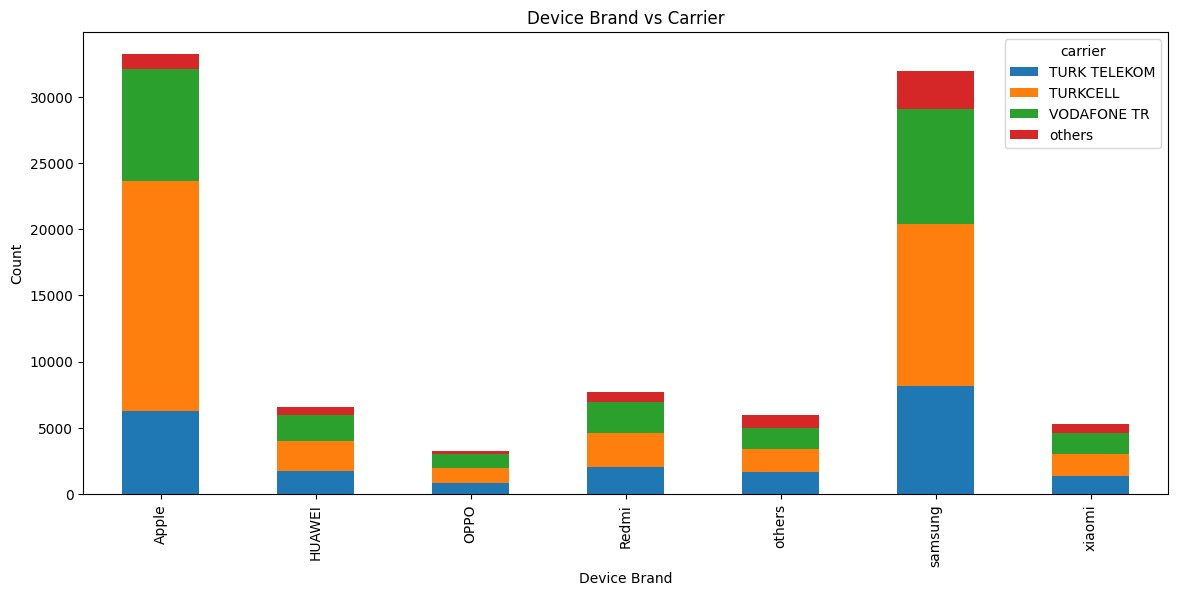

In [350]:
grouped = train_df.groupby(['devicebrand', 'carrier']).size().reset_index(name='count')

pivot = grouped.pivot(index='devicebrand', columns='carrier', values='count')

ax = pivot.plot(kind='bar', stacked=True, figsize=(14, 6))

ax.set_title('Device Brand vs Carrier')
ax.set_xlabel('Device Brand')
ax.set_ylabel('Count')
plt.show()

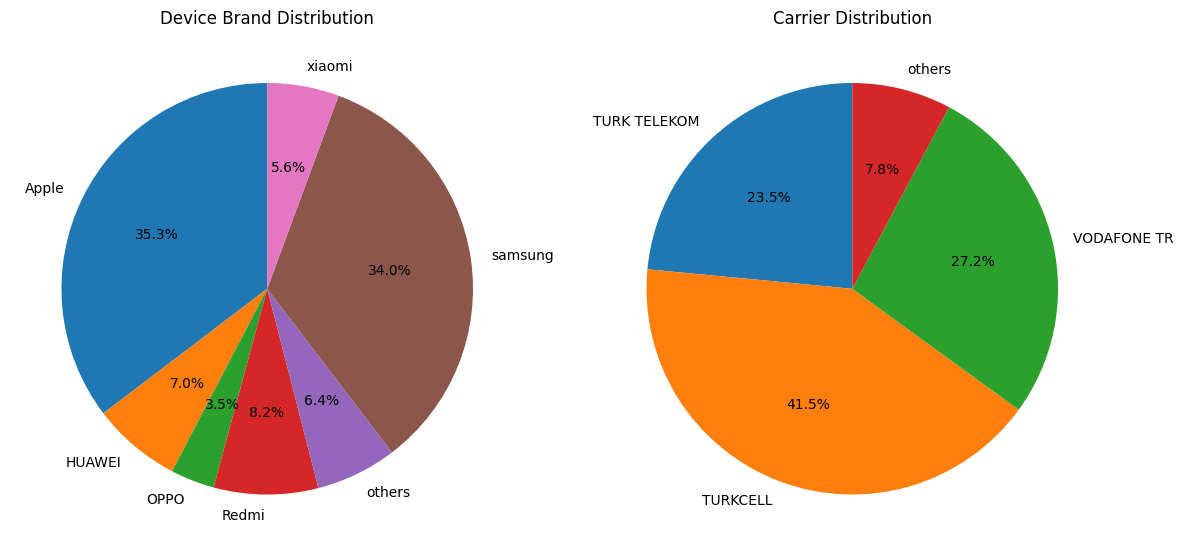

In [351]:
grouped_devicebrand = train_df.groupby('devicebrand').size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Device Brand Distribution
ax1 = axes[0]
ax1.pie(grouped_devicebrand['count'], labels=grouped_devicebrand['devicebrand'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Device Brand Distribution')

grouped_carrier = train_df.groupby('carrier').size().reset_index(name='count')

# Plot for Carrier Distribution
ax2 = axes[1]
ax2.pie(grouped_carrier['count'], labels=grouped_carrier['carrier'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Carrier Distribution')

plt.tight_layout()
plt.show()

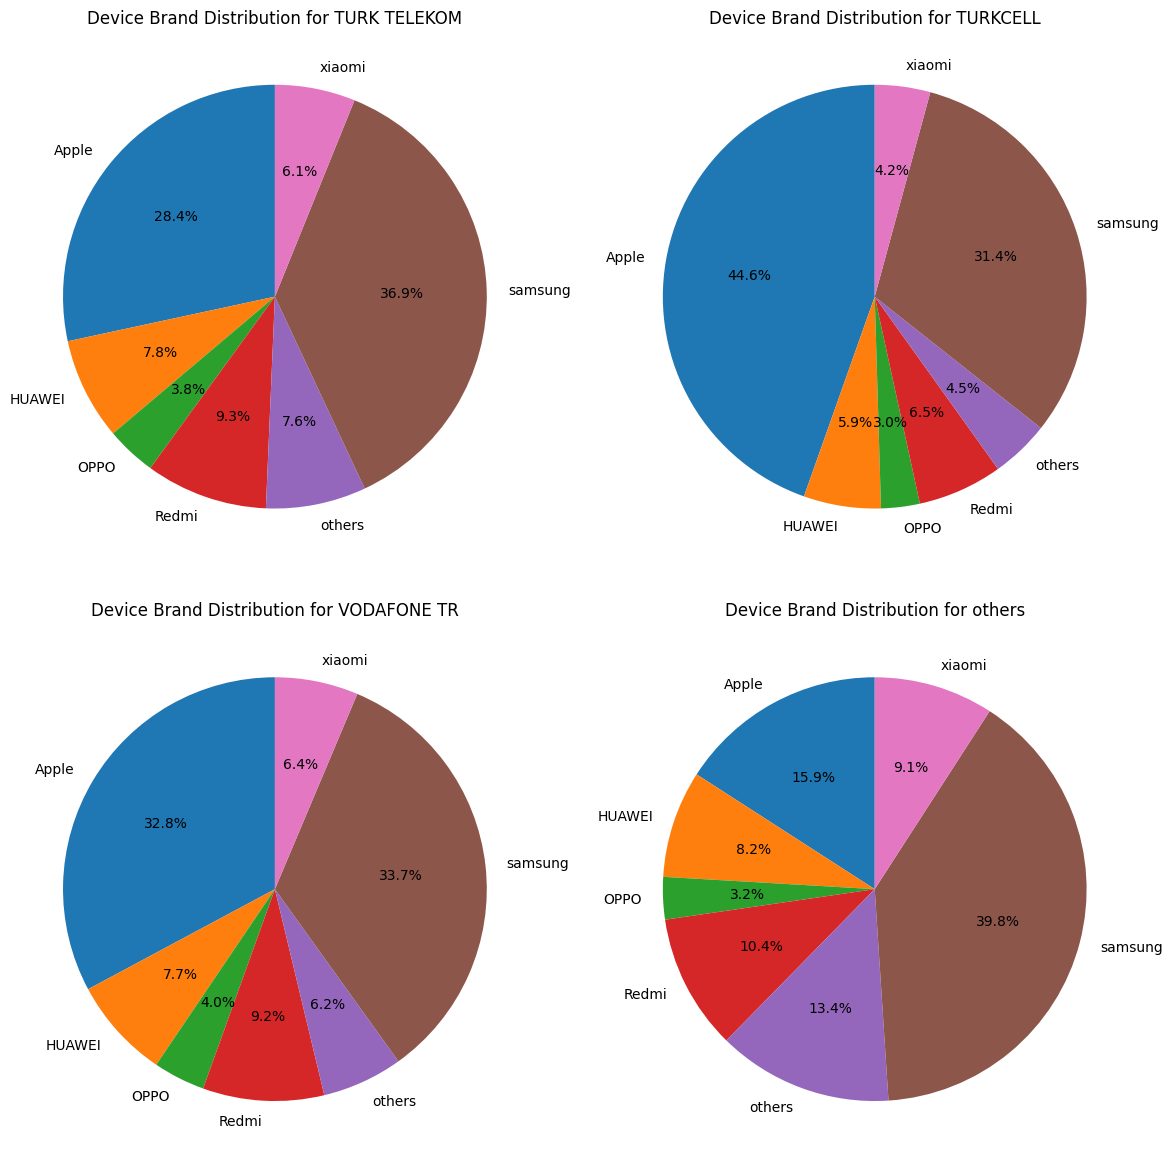

In [352]:
grouped = train_df.groupby(['carrier', 'devicebrand']).size().reset_index(name='count')

pivot = grouped.pivot(index='carrier', columns='devicebrand', values='count')

carriers = pivot.index
device_brands = pivot.columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, carrier in enumerate(carriers):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.pie(pivot.loc[carrier], labels=device_brands, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Device Brand Distribution for {carrier}')

plt.tight_layout()
plt.show()

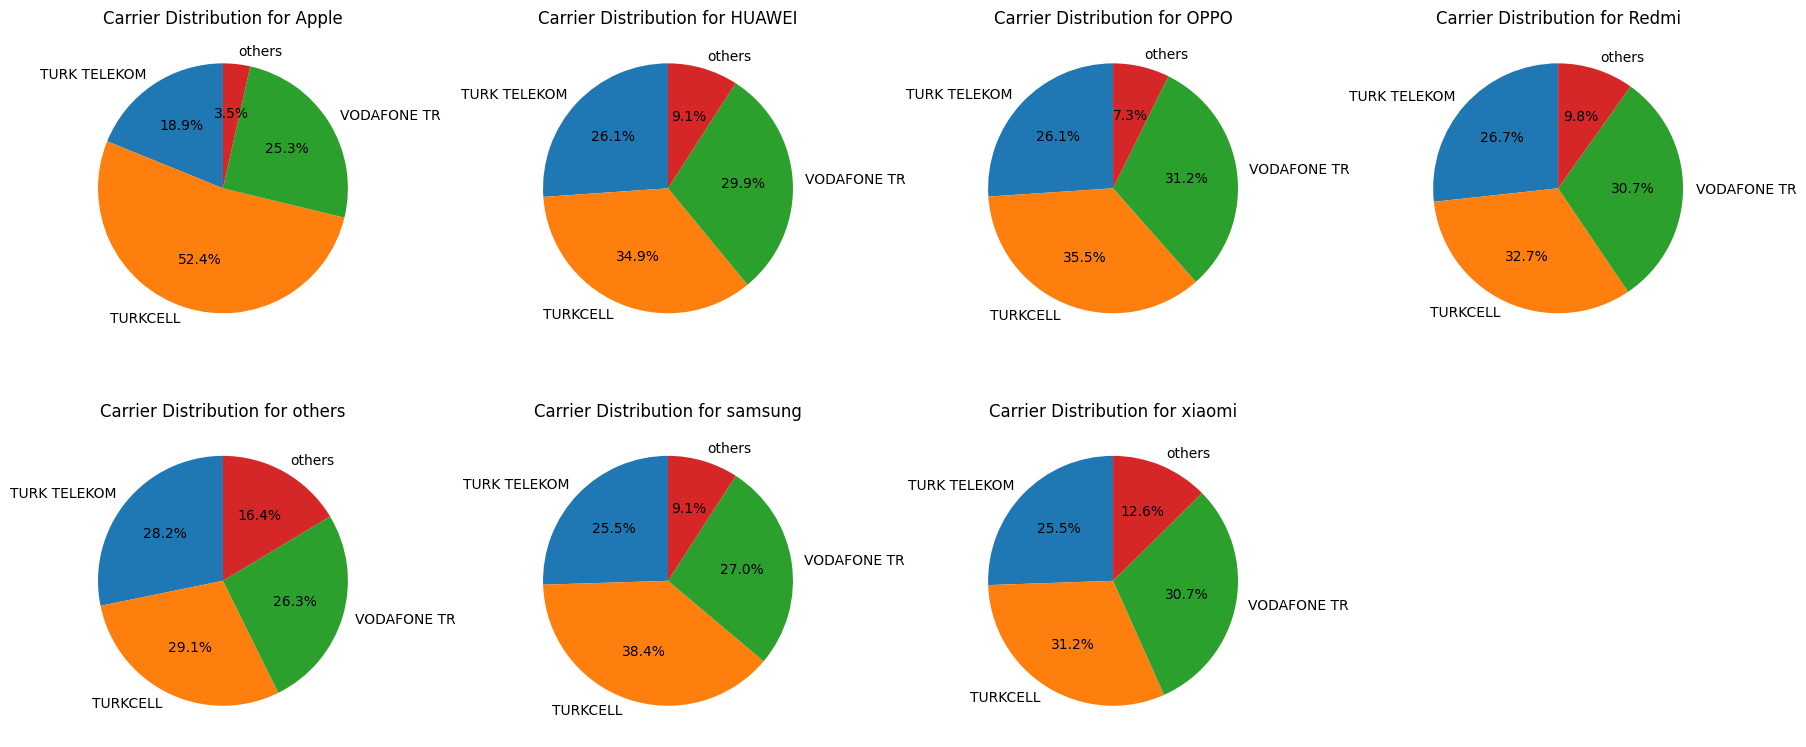

In [353]:
grouped = train_df.groupby(['devicebrand', 'carrier']).size().reset_index(name='count')

pivot = grouped.pivot(index='devicebrand', columns='carrier', values='count')

device_brands = pivot.index
carriers = pivot.columns

num_device_brands = len(device_brands)
num_rows = (num_device_brands - 1) // 4 + 1
num_cols = min(num_device_brands, 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4*num_rows))

for i, device_brand in enumerate(device_brands):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.pie(pivot.loc[device_brand], labels=carriers, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Carrier Distribution for {device_brand}')

fig.delaxes(axes[num_rows-1, num_cols-1])

plt.tight_layout()
plt.show()

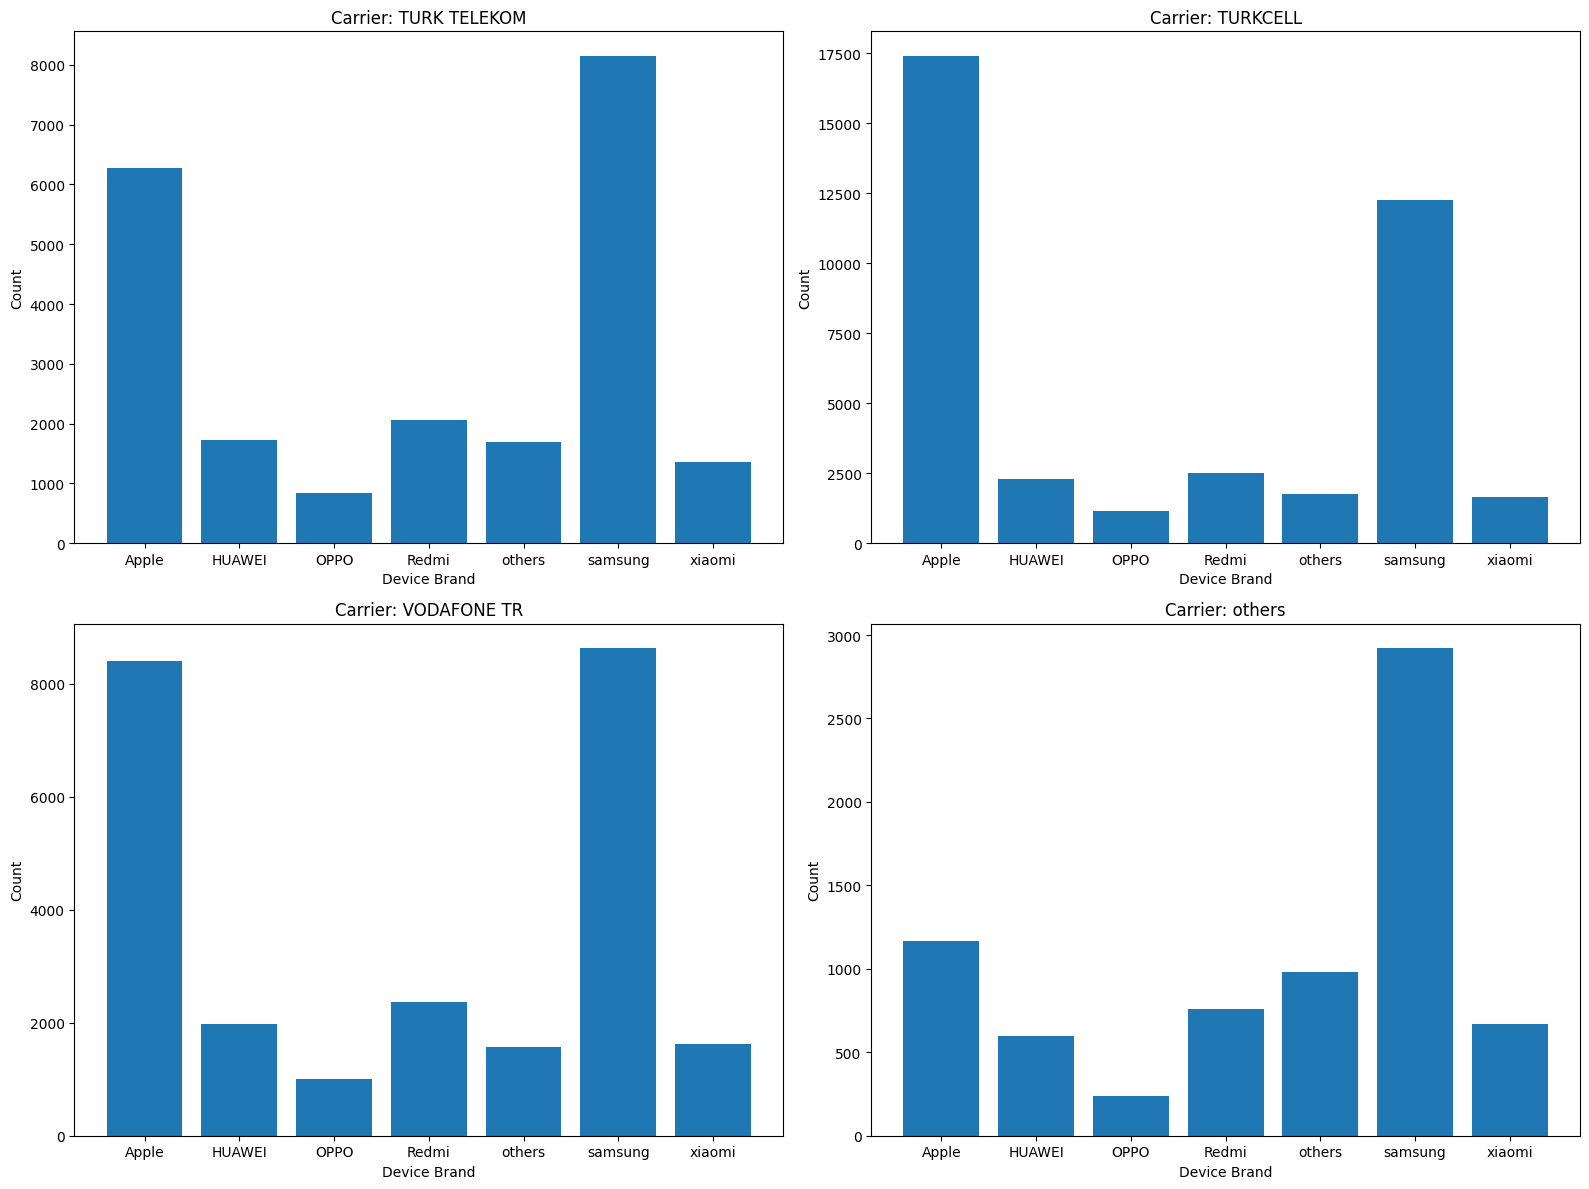

In [354]:
grouped = train_df.groupby(['carrier', 'devicebrand']).size().reset_index(name='count')

pivot = grouped.pivot(index='carrier', columns='devicebrand', values='count')

carriers = pivot.index
device_brands = pivot.columns

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 12))

for i, carrier in enumerate(carriers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.bar(device_brands, pivot.loc[carrier])
    ax.set_xlabel('Device Brand')
    ax.set_ylabel('Count')
    ax.set_title(f'Carrier: {carrier}')

plt.tight_layout()
plt.show()

C:\Users\Hakan\AppData\Local\Temp\ipykernel_12732\860512659.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(carriers, rotation=90)


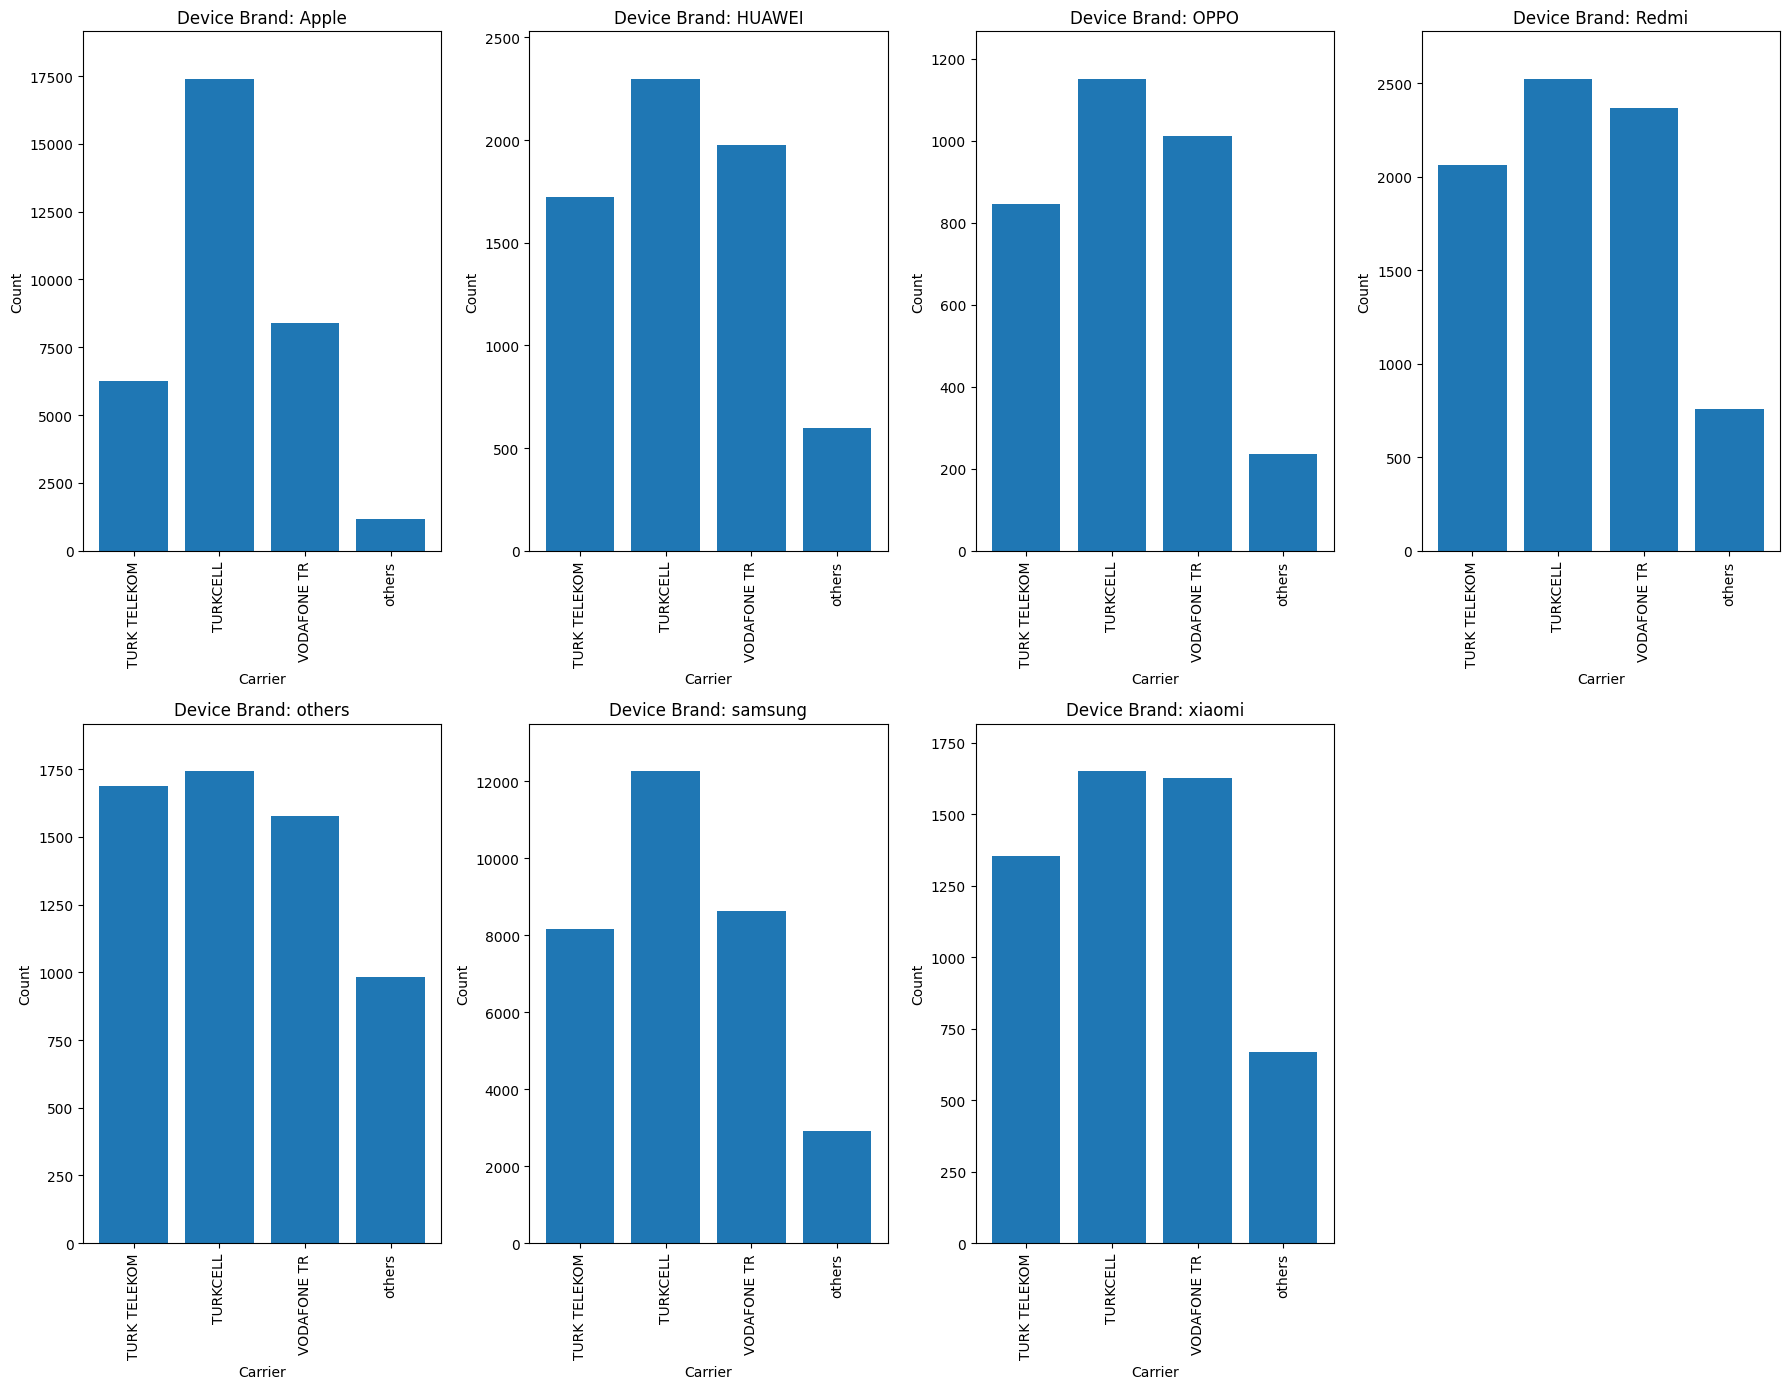

In [355]:
grouped = train_df.groupby(['devicebrand', 'carrier']).size().reset_index(name='count')

pivot = grouped.pivot(index='devicebrand', columns='carrier', values='count')

device_brands = pivot.index
carriers = pivot.columns

num_rows = 2
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 14))

for i, brand in enumerate(device_brands):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Get the carriers and their corresponding counts for the current device brand
    counts = pivot.loc[brand].tolist()
    
    # Create a bar chart for the current device brand
    ax.bar(carriers, counts)
    ax.set_xlabel('Carrier')
    ax.set_ylabel('Count')
    ax.set_title(f'Device Brand: {brand}')
    
    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(carriers, rotation=90)
    
    # Adjust y-axis limits to avoid truncation of bars
    ax.set_ylim(0, max(counts) * 1.1)

# Remove empty subplots if there are fewer than 4 device brands
if len(device_brands) < num_rows * num_cols:
    for i in range(len(device_brands), num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

In [356]:
"""
n_rows = 50 // 4 + (1 if 50 % 4 > 0 else 0)
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_cols * n_rows))

for i, column in enumerate(num_cols):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(train_df[column], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f"{column} Distribution")

for i in range(len(num_cols), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()
"""

'\nn_rows = 50 // 4 + (1 if 50 % 4 > 0 else 0)\nn_cols = 4\nfig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_cols * n_rows))\n\nfor i, column in enumerate(num_cols):\n    row = i // n_cols\n    col = i % n_cols\n    sns.histplot(train_df[column], kde=False, ax=axs[row, col])\n    axs[row, col].set_title(f"{column} Distribution")\n\nfor i in range(len(num_cols), n_rows * n_cols):\n    fig.delaxes(axs.flatten()[i])\n\nplt.tight_layout()\nplt.show()\n'

# Menu and Feature Relations

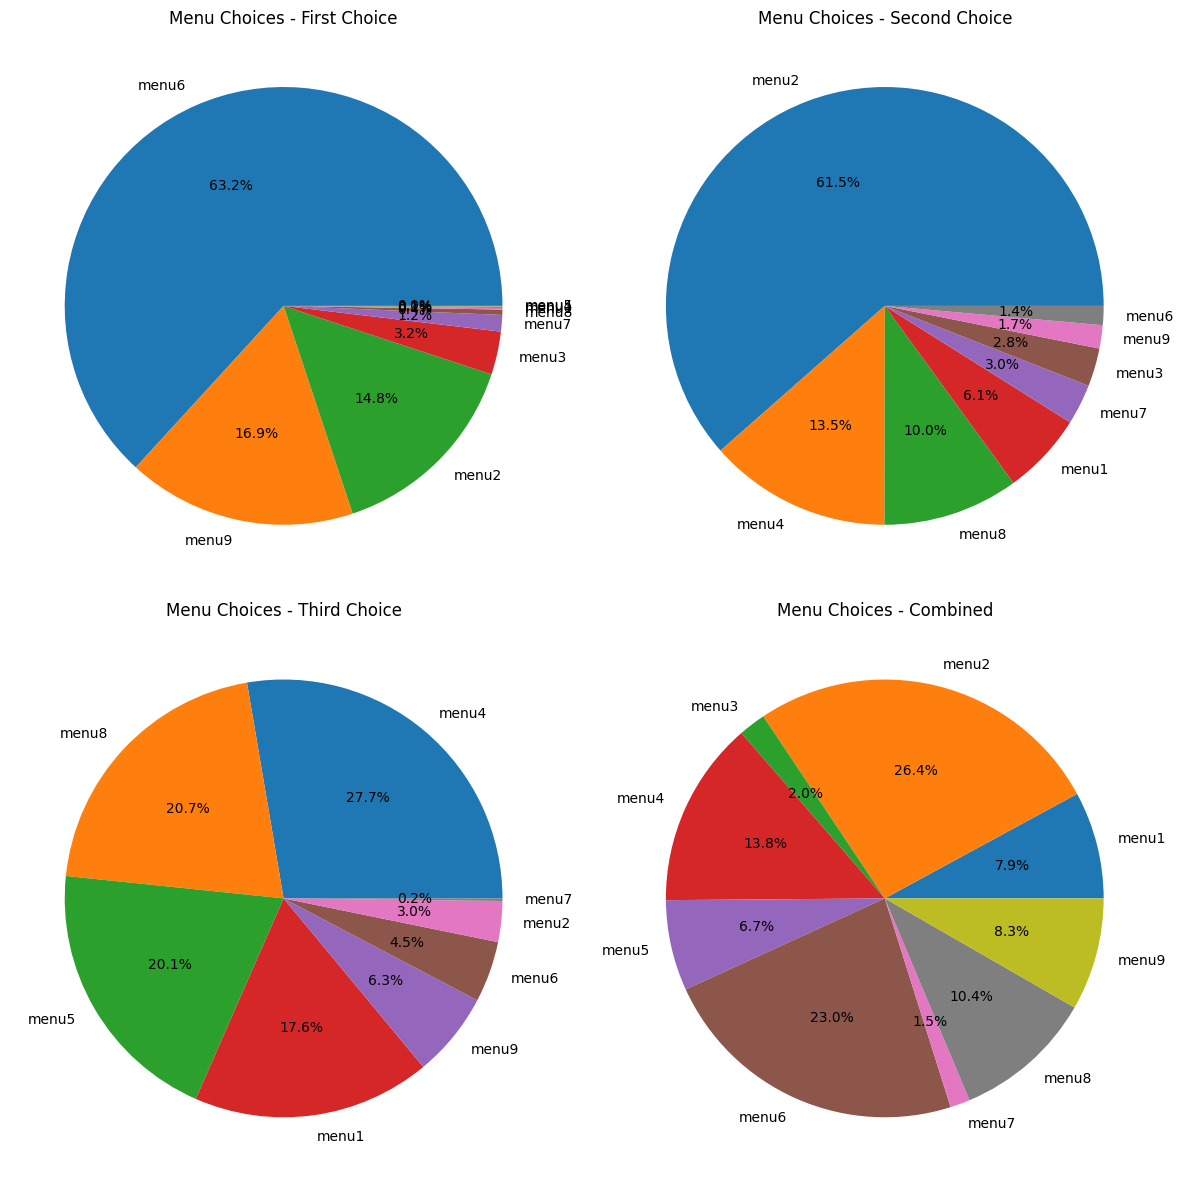

In [357]:
# Calculate the count of each menu choice for first_choice, second_choice, and third_choice
first_choice_counts = train_df['first_choice'].value_counts()
second_choice_counts = train_df['second_choice'].value_counts()
third_choice_counts = train_df['third_choice'].value_counts()

# Calculate the combined count for each menu choice
combined_counts = first_choice_counts.add(second_choice_counts, fill_value=0).add(third_choice_counts, fill_value=0)

# Plotting the pie graphs in a 2 by 2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Pie graph for first_choice
axs[0, 0].pie(first_choice_counts, labels=first_choice_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Menu Choices - First Choice')

# Pie graph for second_choice
axs[0, 1].pie(second_choice_counts, labels=second_choice_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Menu Choices - Second Choice')

# Pie graph for third_choice
axs[1, 0].pie(third_choice_counts, labels=third_choice_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title('Menu Choices - Third Choice')

# Pie graph for all choices combined
axs[1, 1].pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title('Menu Choices - Combined')

# Adjusting the layout
plt.tight_layout()

plt.show()

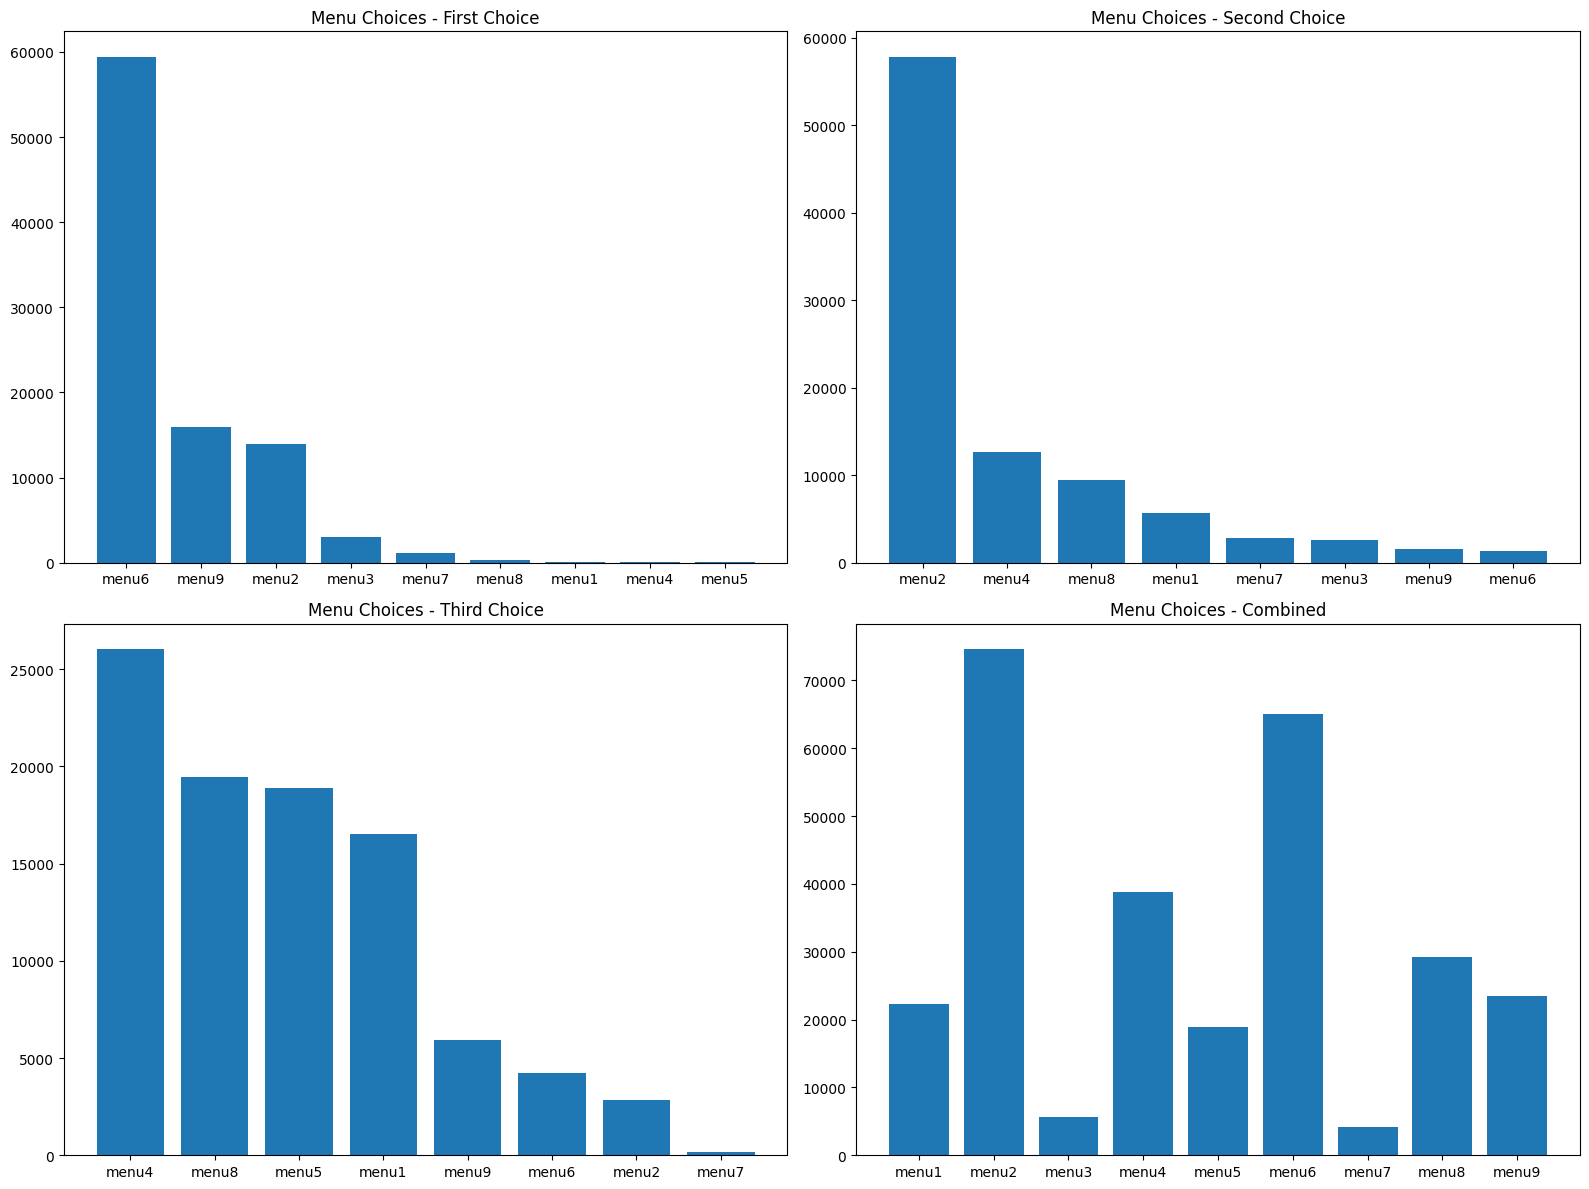

<Figure size 3200x1600 with 0 Axes>

In [358]:
# Calculate the count of each menu choice for first_choice, second_choice, and third_choice
first_choice_counts = train_df['first_choice'].value_counts()
second_choice_counts = train_df['second_choice'].value_counts()
third_choice_counts = train_df['third_choice'].value_counts()

# Calculate the combined count for each menu choice
combined_counts = first_choice_counts.add(second_choice_counts, fill_value=0).add(third_choice_counts, fill_value=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Creating a bar chart for first_choice

axs[0,0].bar(first_choice_counts.index, first_choice_counts.values)
axs[0,0].set_title('Menu Choices - First Choice')

# Creating a bar chart for second_choice
axs[0,1].bar(second_choice_counts.index, second_choice_counts.values)
axs[0,1].set_title('Menu Choices - Second Choice')

# Creating a bar chart for third_choice
axs[1,0].bar(third_choice_counts.index, third_choice_counts.values)
axs[1,0].set_title('Menu Choices - Third Choice')

# Creating a bar chart for all choices combined
axs[1,1].bar(combined_counts.index, combined_counts.values)
axs[1,1].set_title('Menu Choices - Combined')

# Adjusting the layout
plt.tight_layout()
plt.figure(figsize=(32, 16))
plt.show()

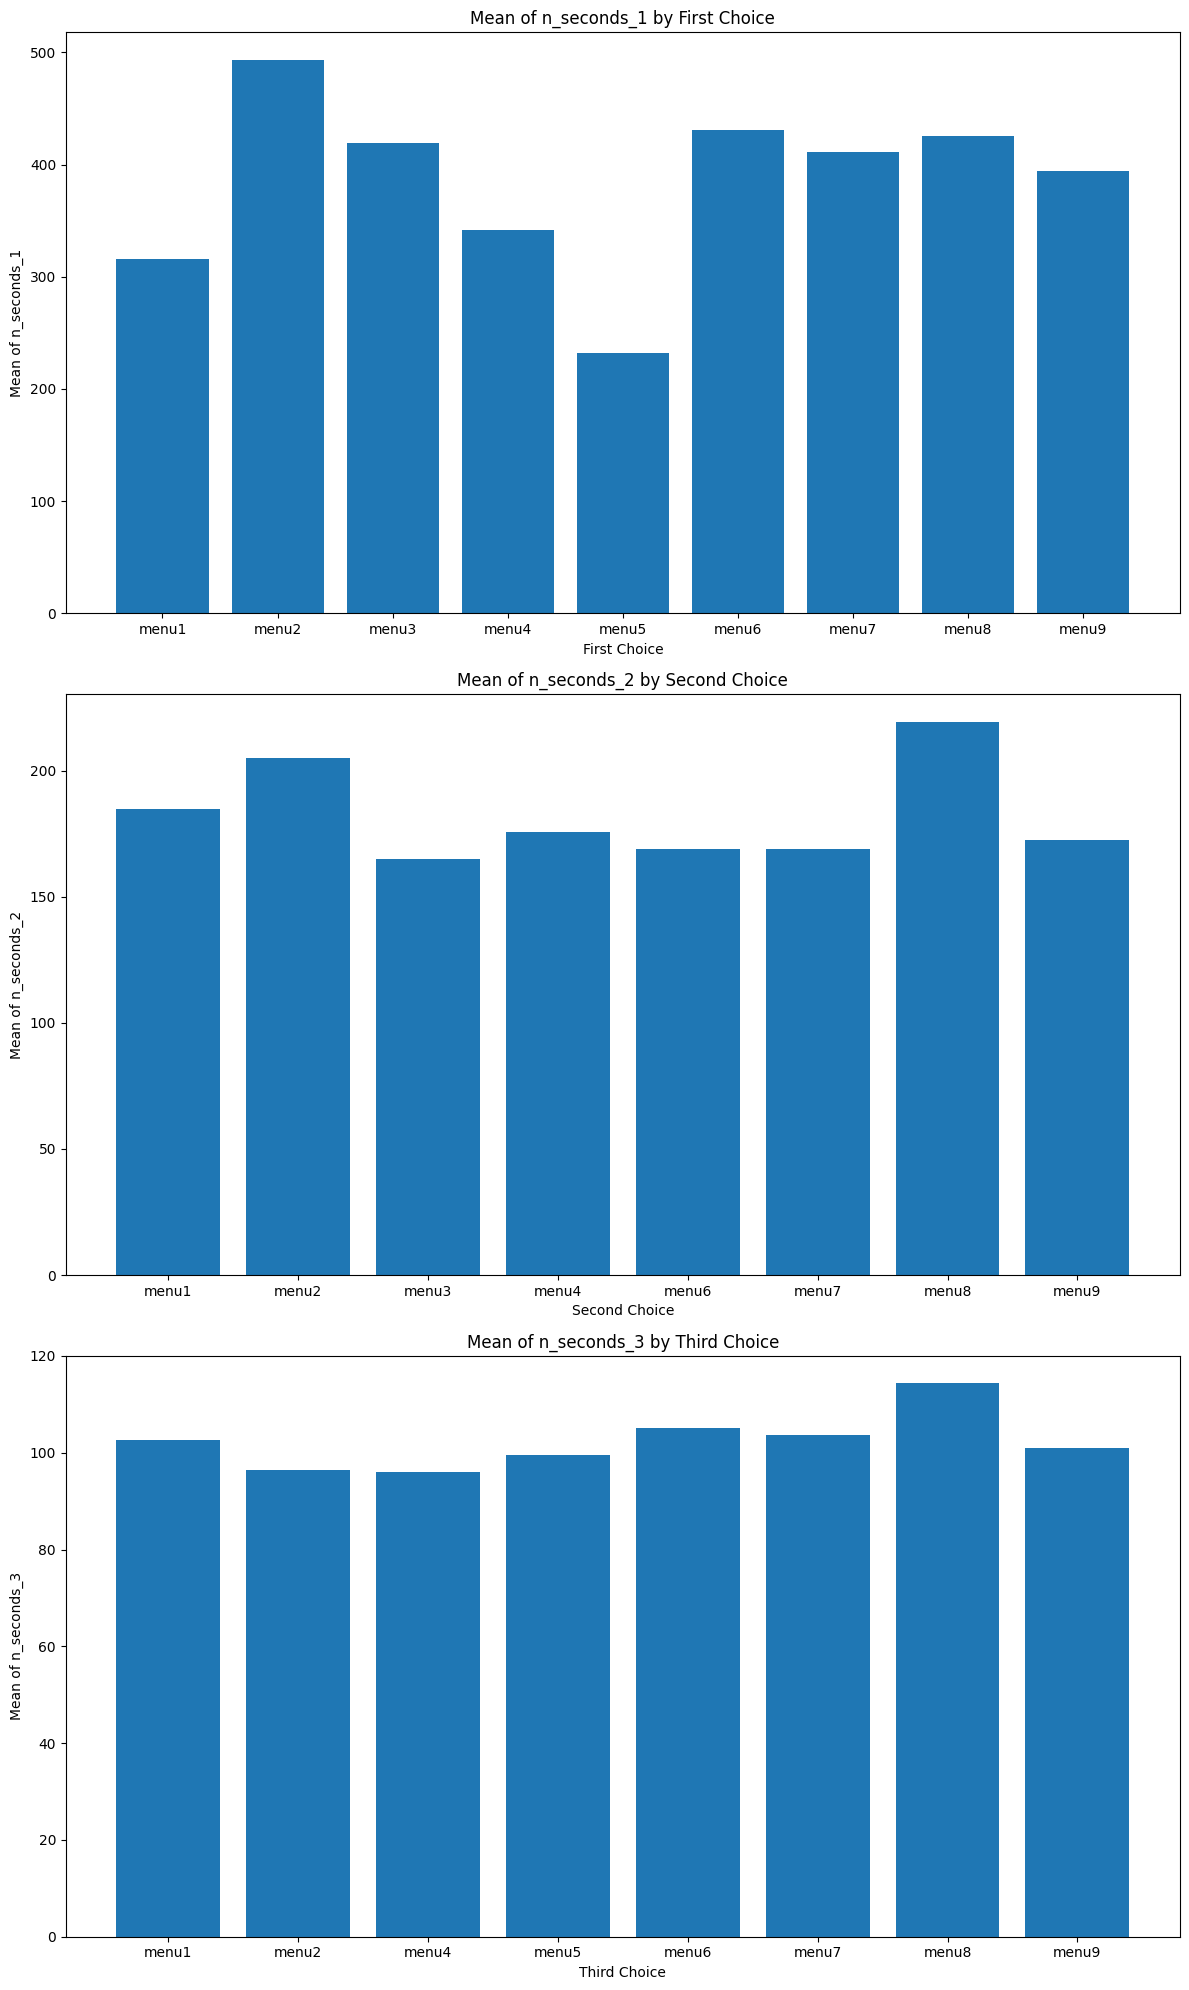

In [359]:
# Calculate the mean of n_seconds_1 for each unique value of first_choice
first_choice_mean = train_df.groupby('first_choice')['n_seconds_1'].mean()

# Calculate the mean of n_seconds_2 for each unique value of second_choice
second_choice_mean = train_df.groupby('second_choice')['n_seconds_2'].mean()

# Calculate the mean of n_seconds_3 for each unique value of third_choice
third_choice_mean = train_df.groupby('third_choice')['n_seconds_3'].mean()

fig, axs = plt.subplots(3, 1, figsize=(12, 20))

# Creating a bar chart for first_choice versus mean of n_seconds_1
axs[0].bar(first_choice_mean.index, first_choice_mean.values)
axs[0].set_title('Mean of n_seconds_1 by First Choice')
axs[0].set_xlabel('First Choice')
axs[0].set_ylabel('Mean of n_seconds_1')

# Creating a bar chart for second_choice versus mean of n_seconds_2
axs[1].bar(second_choice_mean.index, second_choice_mean.values)
axs[1].set_title('Mean of n_seconds_2 by Second Choice')
axs[1].set_xlabel('Second Choice')
axs[1].set_ylabel('Mean of n_seconds_2')

# Creating a bar chart for third_choice versus mean of n_seconds_3
axs[2].bar(third_choice_mean.index, third_choice_mean.values)
axs[2].set_title('Mean of n_seconds_3 by Third Choice')
axs[2].set_xlabel('Third Choice')
axs[2].set_ylabel('Mean of n_seconds_3')

# Adjusting the layout
plt.tight_layout()
plt.show()

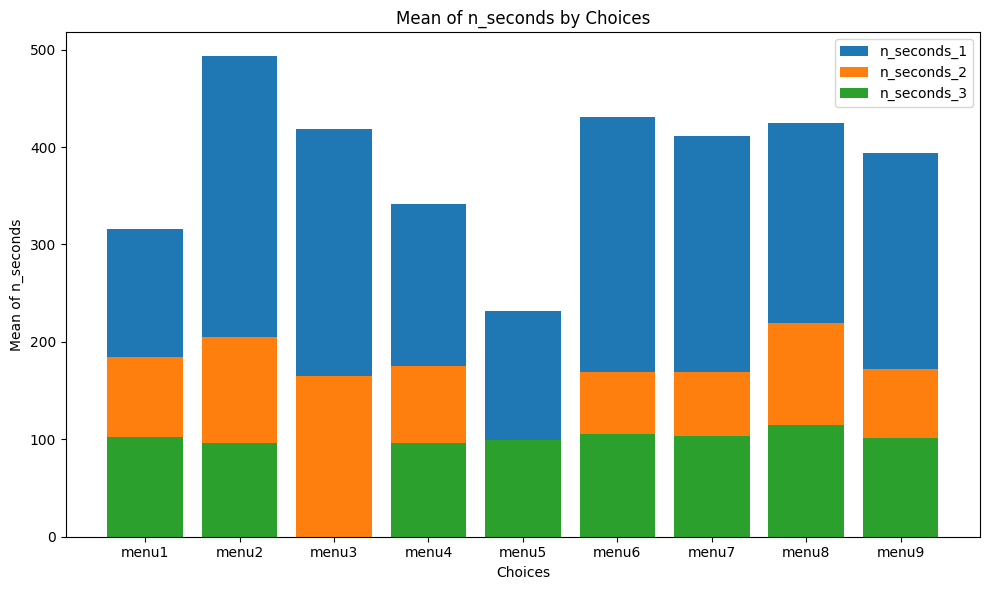

In [360]:
# Calculate the mean of n_seconds_1 for each unique value of first_choice
first_choice_mean = train_df.groupby('first_choice')['n_seconds_1'].mean()

# Calculate the mean of n_seconds_2 for each unique value of second_choice
second_choice_mean = train_df.groupby('second_choice')['n_seconds_2'].mean()

# Calculate the mean of n_seconds_3 for each unique value of third_choice
third_choice_mean = train_df.groupby('third_choice')['n_seconds_3'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar chart for first_choice versus mean of n_seconds_1
ax.bar(first_choice_mean.index, first_choice_mean.values, label='n_seconds_1')

# Creating a bar chart for second_choice versus mean of n_seconds_2
ax.bar(second_choice_mean.index, second_choice_mean.values, label='n_seconds_2')

# Creating a bar chart for third_choice versus mean of n_seconds_3
ax.bar(third_choice_mean.index, third_choice_mean.values, label='n_seconds_3')

ax.set_title('Mean of n_seconds by Choices')
ax.set_xlabel('Choices')
ax.set_ylabel('Mean of n_seconds')
ax.legend()

# Adjusting the layout
plt.tight_layout()
plt.show()

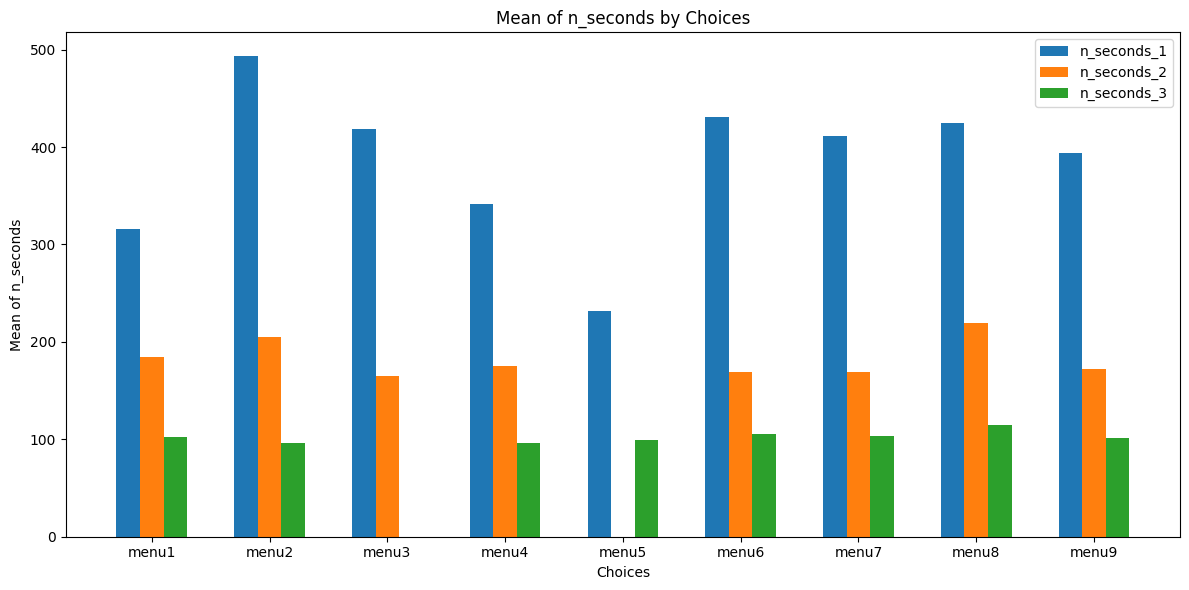

In [361]:
# Calculate the mean of n_seconds_1 for each unique value of first_choice
first_choice_mean = train_df.groupby('first_choice')['n_seconds_1'].mean()

# Calculate the mean of n_seconds_2 for each unique value of second_choice
second_choice_mean = train_df.groupby('second_choice')['n_seconds_2'].mean()

# Calculate the mean of n_seconds_3 for each unique value of third_choice
third_choice_mean = train_df.groupby('third_choice')['n_seconds_3'].mean()

third_choice_mean['menu3'] = 0
second_choice_mean['menu5'] = 0

order = ['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8',
       'menu9']
second_choice_mean = second_choice_mean.reindex(order)
third_choice_mean = third_choice_mean.reindex(order)

fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.2

# Set the x positions of the bars
x_pos = np.arange(len(first_choice_mean))

# Creating three separate bars for each choice versus mean of n_seconds
ax.bar(x_pos - bar_width, first_choice_mean.values, width=bar_width, label='n_seconds_1')
ax.bar(x_pos, second_choice_mean.values, width=bar_width, label='n_seconds_2')
ax.bar(x_pos + bar_width, third_choice_mean.values, width=bar_width, label='n_seconds_3')

ax.set_title('Mean of n_seconds by Choices')
ax.set_xlabel('Choices')
ax.set_ylabel('Mean of n_seconds')
ax.set_xticks(x_pos)
ax.set_xticklabels(first_choice_mean.index)
ax.legend()

# Adjusting the layout
plt.tight_layout()
plt.show()

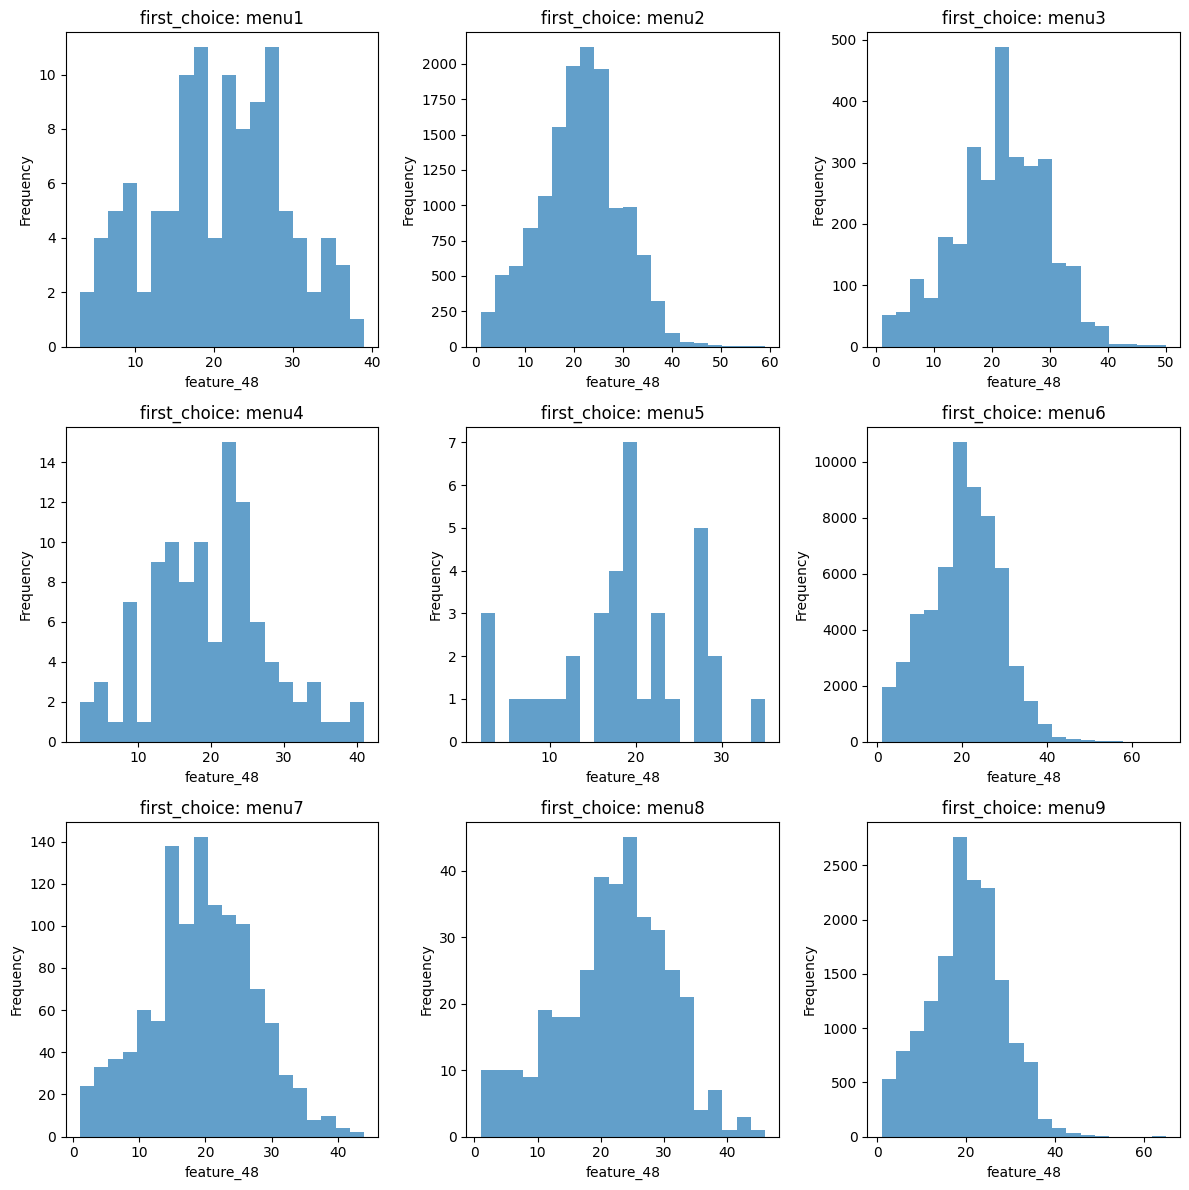

In [362]:
first_choice_feature_0 = train_df.groupby('first_choice')['feature_48']
feature_0_values = [group[1].values for group in first_choice_feature_0]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each unique value of first_choice and plot the distribution of feature_0
for i, (choice, values) in enumerate(zip(first_choice_feature_0.groups.keys(), feature_0_values)):
    ax = axes[i]
    ax.hist(values, bins=20, alpha=0.7)
    ax.set_title(f'first_choice: {choice}')
    ax.set_xlabel('feature_48')
    ax.set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()